In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [8]:
# load dataset
df = pd.read_csv('data/processed-data.csv')

# perform one-hot encoding for categorical columns
df = pd.get_dummies(df, columns = ['ph', 'rainfall'])

# split the dataframe into features (x) and labels (y)
X = df.drop(columns = ['label'])
y = df['label']

# split the data to 90-10 (90% training and testing, 10% unseen)
x_train_test, x_unseen, y_train_test, y_unseen = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [9]:
# instantiate a gaussian naive bayes model
model = GaussianNB()

# instantiate a cross-validation method (80% training, 20% testing)
sp = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

# create a list of metrics needed
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'roc_auc_ovr']

# perform cross-validation and obtain the metrics
metrics_results = cross_validate(model, x_train_test, y_train_test, cv = sp, scoring = metrics, return_estimator = True)

# initialize a list to store the confusion matrices
conf_matrices = []

# obtain the confusion matrices for all folds
for estimator, (_, test_index) in zip(metrics_results['estimator'], sp.split(x_train_test, y_train_test)):
    # predict using the test set
    y_pred = estimator.predict(x_train_test.iloc[test_index])

    # compute the confusion matrix for this iteration
    conf_matrix = confusion_matrix(y_train_test.iloc[test_index], y_pred)

    # append the matrix to the list
    conf_matrices.append(conf_matrix)

# compute the average confusion matrix
conf_matrix_avg = np.mean(conf_matrices, axis = 0)

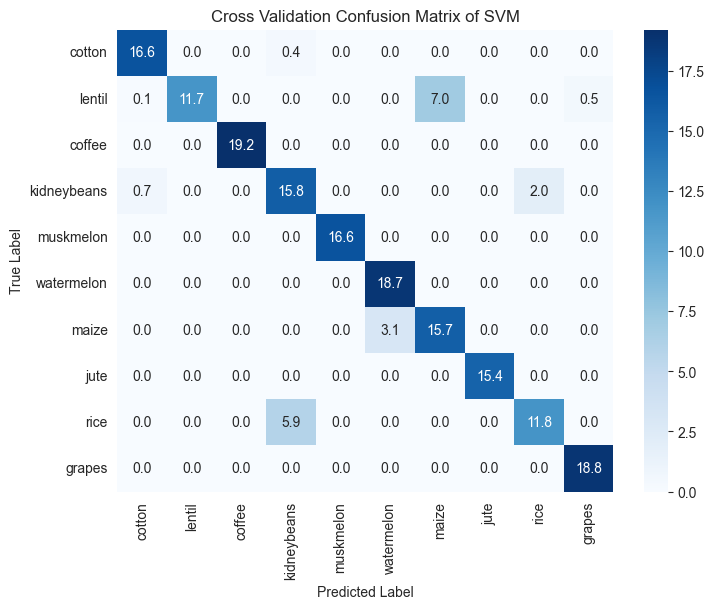

In [10]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=y_train_test.unique(), yticklabels=y_train_test.unique())

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Cross Validation Confusion Matrix of SVM")
plt.show()

In [11]:
# results for the cross-validation
print('\nCross-Validation Evaluation Results:')
print(f'Accuracy: {metrics_results["test_accuracy"].mean():.4f}')
print(f'Precision: {metrics_results["test_precision_macro"].mean():.4f}')
print(f'Recall: {metrics_results["test_recall_macro"].mean():.4f}')
print(f'ROC AUC: {metrics_results["test_roc_auc_ovr"].mean():.4f}')


Cross-Validation Evaluation Results:
Accuracy: 0.8906
Precision: 0.9065
Recall: 0.8947
ROC AUC: 0.9953


In [12]:
# fit the model
model.fit(x_train_test, y_train_test)

# predict on unseen data
y_pred = model.predict(x_unseen)

# compute metrics
conf_matrix = confusion_matrix(y_unseen, y_pred)
accuracy = accuracy_score(y_unseen, y_pred)
precision = precision_score(y_unseen, y_pred, average = 'weighted')
recall = recall_score(y_unseen, y_pred, average = 'weighted')
roc_auc = roc_auc_score(y_unseen, model.predict_proba(x_unseen), multi_class='ovr')

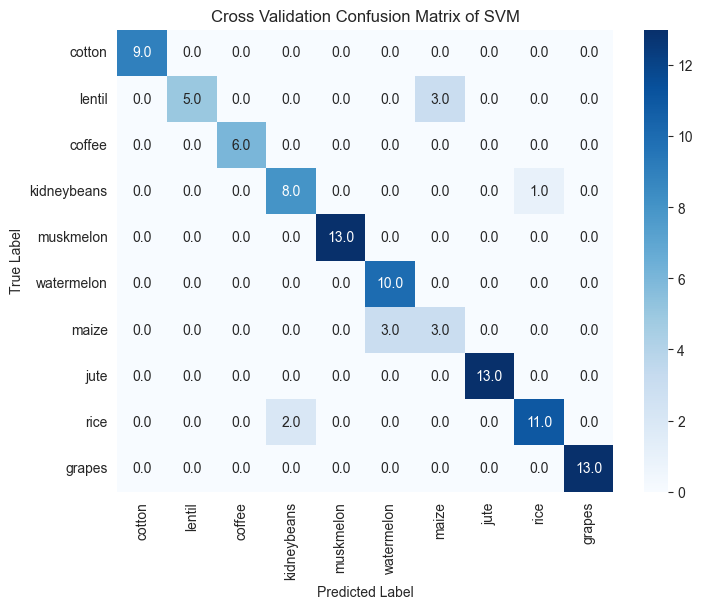

In [13]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues", xticklabels=y_train_test.unique(), yticklabels=y_train_test.unique())

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Cross Validation Confusion Matrix of SVM")
plt.show()

In [14]:
# results for the unseen set
print('\nUnseen Set Evaluation Results:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Unseen Set Evaluation Results:
Accuracy: 0.9100
Precision: 0.9181
Recall: 0.9100
ROC AUC: 0.9954
